# Multi-modal vector embeddings

A vector embedding can also represent non-textual data, such as images.

In [ ]:
import os
import mimetypes

import requests
from PIL import Image
import dotenv
from azure.identity import DefaultAzureCredential, get_bearer_token_provider

dotenv.load_dotenv()

azure_credential = DefaultAzureCredential(exclude_shared_token_cache_credential=True)
token_provider = get_bearer_token_provider(azure_credential, "https://cognitiveservices.azure.com/.default")

AZURE_AI_VISION_ENDPOINT = os.environ["AZURE_AI_VISION_ENDPOINT"]
AZURE_AI_VISION_API_URL = AZURE_AI_VISION_ENDPOINT.rstrip('/') + "/computervision/retrieval"

def get_model_params():
    return {"api-version": "2024-02-01", "model-version": "2023-04-15"}

def get_auth_headers():
    return {"Authorization": "Bearer " + token_provider()}

def get_image_embedding(image_file):
    mimetype = mimetypes.guess_type(image_file)[0]
    url = f"{AZURE_AI_VISION_API_URL}:vectorizeImage"
    headers = get_auth_headers()
    headers["Content-Type"] = mimetype
    response = requests.post(url, headers=headers, params=get_model_params(), data=open(image_file, "rb"))
    if response.status_code != 200:
        print(image_file, response.status_code, response.json())
    return response.json()["vector"]

def get_text_embedding(text):
    url = f"{AZURE_AI_VISION_API_URL}:vectorizeText"
    return requests.post(url, headers=get_auth_headers(), params=get_model_params(),
                         json={"text": text}).json()["vector"]


In [ ]:
import json

vectors = {}
for image_file in os.listdir("product_images"):
    image_embedding = get_image_embedding(f"product_images/{image_file}")
    vectors[image_file] = image_embedding

# save the vectors to a file
with open("embeddings/images_ai-vision.json", "w") as f:
    json.dump(vectors, f)
    

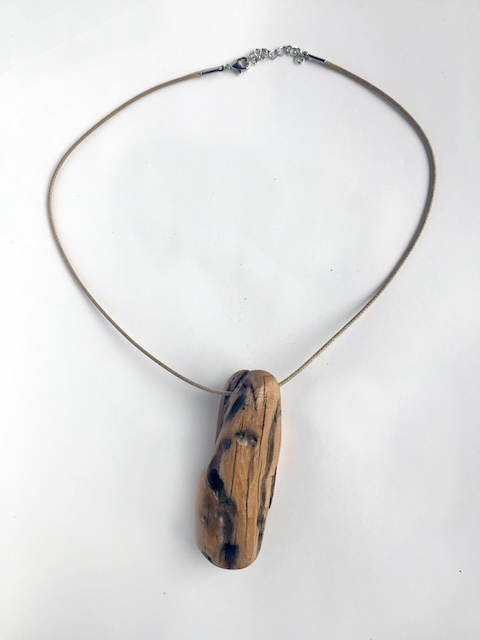

In [3]:
Image.open("product_images/amulet8_fullshot.jpg")

In [4]:
vectors["amulet8_fullshot.jpg"]

[0.734375,
 -0.25756836,
 -0.96875,
 0.8911133,
 -2.1757812,
 0.10205078,
 1.40625,
 -1.9619141,
 -1.5791016,
 1.2314453,
 -1.0410156,
 -1.1298828,
 0.14709473,
 0.6899414,
 3.1796875,
 2.109375,
 2.1113281,
 2.6074219,
 0.73535156,
 -1.4609375,
 -0.34643555,
 0.49731445,
 -0.70947266,
 -1.7402344,
 -0.22558594,
 2.09375,
 -50.375,
 -1.6289062,
 0.4267578,
 0.04953003,
 0.15039062,
 1.0771484,
 2.5253906,
 -0.49926758,
 -2.3242188,
 2.1132812,
 3.59375,
 -1.8867188,
 2.8300781,
 0.75927734,
 1.3027344,
 -0.28710938,
 -0.69433594,
 -0.0647583,
 0.88427734,
 1.0371094,
 0.5883789,
 -1.0673828,
 0.5107422,
 -1.3388672,
 1.3925781,
 -1.5058594,
 0.3720703,
 -1.7958984,
 1.0625,
 2.2753906,
 2.265625,
 1.7695312,
 -1.4589844,
 0.107788086,
 0.90527344,
 -1.3515625,
 1.0224609,
 -0.69628906,
 0.24487305,
 -1.2851562,
 -0.70751953,
 -2.234375,
 -1.3134766,
 0.45141602,
 -3.4023438,
 1.3681641,
 1.3476562,
 -0.75390625,
 -1.1171875,
 0.1550293,
 -1.9306641,
 0.5,
 -1.0146484,
 2.40625,
 -0.130

In [5]:
len(vectors["amulet8_fullshot.jpg"])

1024

In [ ]:
import csv

# Open most-common-nouns-english.csv and read the first column as words
words = []
with open('embeddings/most-common-nouns-english.csv') as f:
    reader = csv.reader(f)
    next(reader)
    for row in reader:
        words.append(row[0])

# Calculate embeddings for all words
word_vectors = {}
for word in words:
    word_embedding = get_text_embedding(word)
    word_vectors[word] = word_embedding

# Save embeddings to a file
with open('embeddings/words_ai-vision.json', 'w') as f:
    json.dump(word_vectors, f)

In [14]:
word_vectors["time"]

[0.011690983,
 -0.009620458,
 0.017175259,
 -0.017673155,
 -0.009046124,
 0.0028188203,
 0.011545039,
 -0.014368198,
 0.014442478,
 0.014623431,
 0.015065165,
 0.00042011213,
 -0.0014555957,
 -0.016261779,
 -0.011267354,
 -0.000994232,
 0.004056177,
 0.0064508123,
 0.0017096518,
 -0.022140384,
 -0.0042338367,
 -0.032341678,
 -0.016602129,
 0.015100859,
 -0.0068019982,
 -0.015637828,
 0.009376598,
 0.016046988,
 -0.025700444,
 0.006173764,
 -0.00080972497,
 0.005256378,
 0.024644634,
 0.0027394234,
 0.001969148,
 -0.011291228,
 3.3870103e-05,
 0.01274082,
 -0.016525341,
 0.010700018,
 0.0019341275,
 0.0066786567,
 0.003057214,
 -0.014592948,
 0.0022541722,
 -0.0014702374,
 0.019207258,
 0.0046008555,
 0.023107762,
 0.0034661116,
 -0.034713883,
 -0.0069477092,
 0.020136578,
 -0.0055147754,
 -0.0029195163,
 0.00891475,
 -0.00072945794,
 0.017023377,
 0.03231718,
 -0.009348661,
 0.024243753,
 -0.015751058,
 0.01733636,
 0.025417704,
 0.0004455474,
 -0.024058154,
 0.003977032,
 0.019410236,

In [15]:
len(word_vectors["time"])

1024